In [1]:
import pandas as pd
from sklearn import ensemble, linear_model, tree, neighbors, svm
from sklearn.model_selection import train_test_split


In [17]:
systems = ["MySQL","PostgreSQL", "HSQLDB"]

In [35]:
system_results = []

for system in systems:
    df = pd.read_csv(f"../PerformanceEvolution_Website/PerformanceEvolution_Data/{system}/measurements.csv", delimiter=";")
    
    version_counts = df['revision'].value_counts().reset_index()
    version_counts.columns = ['revision', 'count']

    specific_version = version_counts["revision"][0]
    df_specific_version = df[df['revision'] == specific_version]

    # Step 2: Drop the 'revision' and 'cpu' columns
    df_specific_version = df_specific_version.drop(columns=['revision', 'cpu'])

    # Step 3: Separate the features (X) and the target variable (y)
    X = df_specific_version.drop(columns=['performance'])
    y = df_specific_version['performance']

    # Step 4: Create the train-test split with train_size = 0.9
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

    gb_reg = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
    lin_reg = linear_model.LinearRegression()
    dt_reg = tree.DecisionTreeRegressor(max_depth=12, min_samples_split=100)
    rf_reg = ensemble.RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
    svr_reg = svm.SVR()
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors=5)

    # Train the models
    models = {
        'Gradient Boosting': gb_reg,
        'Linear Regression': lin_reg,
        'Decision Tree': dt_reg,
        'Random Forest': rf_reg,
        'Support Vector Regressor': svr_reg,
        'K-Nearest Neighbors': knn_reg
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)

    results = {model_name: [] for model_name in models}

    other_versions = df[df['revision'] != specific_version]['revision'].unique()
    other_versions = df['revision'].unique()

    for version in other_versions:
        df_version = df[df['revision'] == version].drop(columns=['revision', 'cpu'])
        X_version = df_version.drop(columns=['performance'])
        y_version = df_version['performance']
        
        for model_name, model in models.items():
            y_pred_version = model.predict(X_version)
            dfErrorsVersion = pd.DataFrame({"% error":((y_pred_version - y_version)/y_version).abs()*100})
            error_version = dfErrorsVersion["% error"].mean()
            results[model_name].append((version, error_version))

            if version == specific_version:
                system_results.append({
                    "model": model_name,
                    "system" : system,
                    "error" : error_version
                })
            print(f"MAPE for {model_name} on {version} : {error_version}")

    # Convert results to DataFrames for plotting
    df_results = {model_name: pd.DataFrame(result, columns=['Version', 'MAPE']) for model_name, result in results.items()}
    
    revisions = sorted(other_versions)
    summary_df = pd.DataFrame(index=revisions)

    # Populate the summary DataFrame with MAPE scores
    for model_name, df_result in df_results.items():
        df_result.set_index('Version', inplace=True)
        summary_df[model_name] = df_result['MAPE']

    
system_results_df = pd.DataFrame(system_results)
system_results_df = system_results_df.sort_values(['system', 'error'], ascending=[True, True])

MySQL
PostgreSQL
HSQLDB
\begin{tabular}{llr}
\toprule
model & system & error \\
\midrule
Gradient Boosting & HSQLDB & 0.234457 \\
Linear Regression & HSQLDB & 0.440420 \\
K-Nearest Neighbors & HSQLDB & 0.741941 \\
Decision Tree & HSQLDB & 1.542175 \\
Random Forest & HSQLDB & 2.256456 \\
Support Vector Regressor & HSQLDB & 13.532246 \\
Gradient Boosting & MySQL & 2.259833 \\
Decision Tree & MySQL & 2.616872 \\
Random Forest & MySQL & 2.792897 \\
K-Nearest Neighbors & MySQL & 13.719582 \\
Support Vector Regressor & MySQL & 15.798255 \\
Linear Regression & MySQL & 16.184839 \\
Gradient Boosting & PostgreSQL & 0.611182 \\
Decision Tree & PostgreSQL & 0.708104 \\
Random Forest & PostgreSQL & 0.708758 \\
Linear Regression & PostgreSQL & 1.247117 \\
K-Nearest Neighbors & PostgreSQL & 12.913161 \\
Support Vector Regressor & PostgreSQL & 26.310400 \\
\bottomrule
\end{tabular}



In [21]:
version_counts = df['revision'].value_counts().reset_index()
version_counts.columns = ['revision', 'count']
print(version_counts["revision"][0])

2.1.0


In [10]:

specific_version = '9.3.4'
df_specific_version = df[df['revision'] == specific_version]

# Step 2: Drop the 'revision' and 'cpu' columns
df_specific_version = df_specific_version.drop(columns=['revision', 'cpu'])

# Step 3: Separate the features (X) and the target variable (y)
X = df_specific_version.drop(columns=['performance'])
y = df_specific_version['performance']

# Step 4: Create the train-test split with train_size = 0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

# Output the shapes of the resulting splits to verify
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (777, 18)
X_test shape: (87, 18)
y_train shape: (777,)
y_test shape: (87,)


In [11]:
gb_reg = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
lin_reg = linear_model.LinearRegression()
dt_reg = tree.DecisionTreeRegressor(max_depth=12, min_samples_split=100)
rf_reg = ensemble.RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
svr_reg = svm.SVR()
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=5)

# Train the models
models = {
    'Gradient Boosting': gb_reg,
    'Linear Regression': lin_reg,
    'Decision Tree': dt_reg,
    'Random Forest': rf_reg,
    'Support Vector Regressor': svr_reg,
    'K-Nearest Neighbors': knn_reg
}

for model_name, model in models.items():
    model.fit(X_train, y_train)

In [14]:
results = {model_name: [] for model_name in models}

other_versions = df[df['revision'] != specific_version]['revision'].unique()

for version in other_versions:
    df_version = df[df['revision'] == version].drop(columns=['revision', 'cpu'])
    X_version = df_version.drop(columns=['performance'])
    y_version = df_version['performance']
    
    for model_name, model in models.items():
        y_pred_version = model.predict(X_version)
        dfErrorsVersion = pd.DataFrame({"% error":((y_pred_version - y_version)/y_version).abs()*100})
        error_version = dfErrorsVersion["% error"].mean()
        results[model_name].append((version, error_version))
        print(f"MAPE for {model_name} on {version} : {error_version}")

# Convert results to DataFrames for plotting
df_results = {model_name: pd.DataFrame(result, columns=['Version', 'MAPE']) for model_name, result in results.items()}


MAPE for Gradient Boosting on 8.3.0 : 28.16945731325024
MAPE for Linear Regression on 8.3.0 : 28.186992921333882
MAPE for Decision Tree on 8.3.0 : 28.192971792231365
MAPE for Random Forest on 8.3.0 : 28.235612022875735
MAPE for Support Vector Regressor on 8.3.0 : 28.470163018719898
MAPE for K-Nearest Neighbors on 8.3.0 : 28.298761915141252
MAPE for Gradient Boosting on 8.3.5 : 27.162494368632906
MAPE for Linear Regression on 8.3.5 : 27.18164118545555
MAPE for Decision Tree on 8.3.5 : 27.18648183404915
MAPE for Random Forest on 8.3.5 : 27.228221063270027
MAPE for Support Vector Regressor on 8.3.5 : 27.459579239016016
MAPE for K-Nearest Neighbors on 8.3.5 : 27.290697032455995
MAPE for Gradient Boosting on 8.4.0 : 29.698776221553246
MAPE for Linear Regression on 8.4.0 : 29.695005607967634
MAPE for Decision Tree on 8.4.0 : 29.686603800466983
MAPE for Random Forest on 8.4.0 : 29.677337103819998
MAPE for Support Vector Regressor on 8.4.0 : 29.727854984989932
MAPE for K-Nearest Neighbors on 8

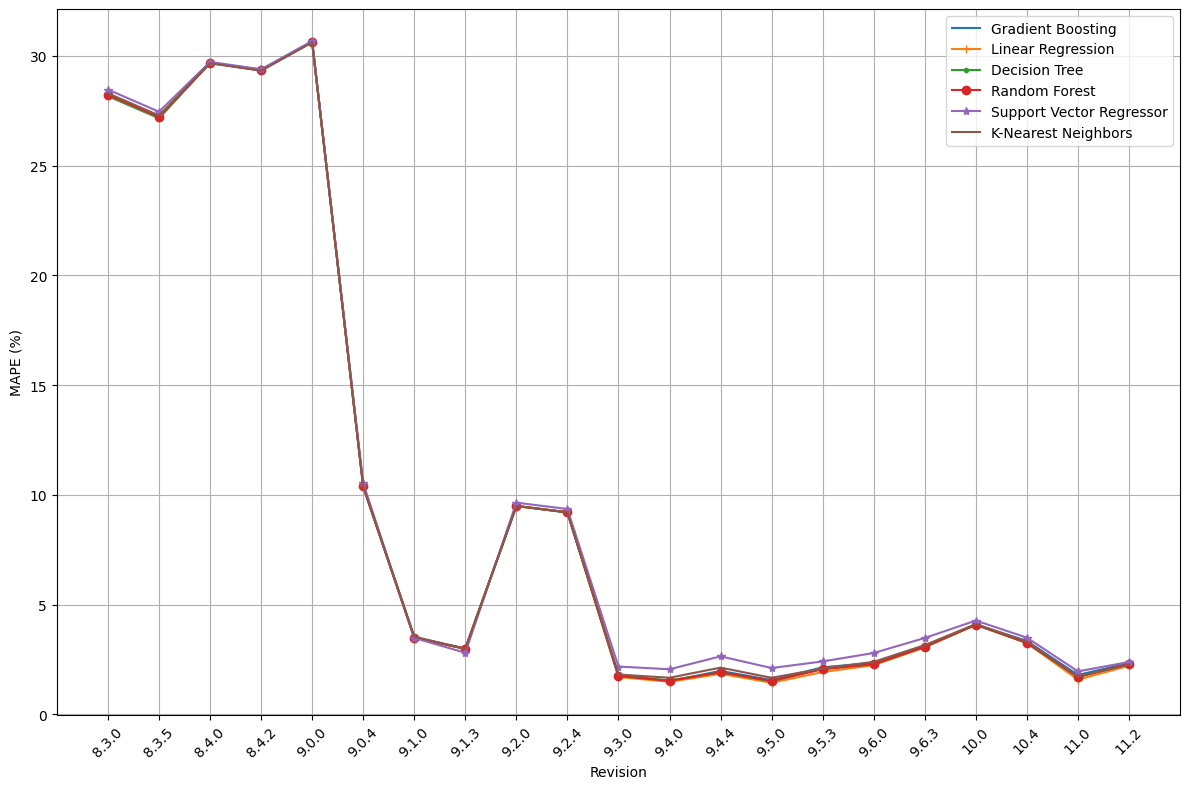

In [15]:
import matplotlib.pyplot as plt
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*')) 

plt.figure(figsize=(12, 8))

for model_name, df_result in df_results.items():
    plt.plot(df_result['Version'], df_result['MAPE'], marker=next(marker), linestyle='-', label=model_name)

plt.xlabel('Revision')
plt.ylabel('MAPE (%)')
# plt.title('MAPE by Revision for Different Models [MySQL]')
plt.title('')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()